In [0]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [7]:

from pandas_datareader import data as pdr
import fix_yahoo_finance

aapl = pdr.get_data_yahoo('AAPL', start=datetime.datetime(2006, 10, 1), end=datetime.datetime(2012, 1, 1))
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-02,10.838572,10.614285,10.728572,10.694285,178159800,9.333044
2006-10-03,10.707143,10.455714,10.635715,10.582857,197677200,9.235797
2006-10-04,10.780000,10.451428,10.585714,10.768572,207270700,9.397876
2006-10-05,10.880000,10.590000,10.647142,10.690000,170970800,9.329307
2006-10-06,10.720000,10.544286,10.631429,10.602858,116739700,9.253254


In [4]:
!pip3 install quandl

     |████████████████████████████████| 61kB 4.6MB/s 
     |████████████████████████████████| 61kB 19.8MB/s 
     |████████████████████████████████| 2.3MB 7.9MB/s 
  Created wheel for inflection: filename=inflection-0.3.1-cp36-none-any.whl size=6076 sha256=496ab66c2b95c1d0d202f08a76b35fc6fc18336b65a382da387c952f7e89c715
  Stored in directory: /root/.cache/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built inflection
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: more-itertools 7.2.0
    Uninstalling more-itertools-7.2.0:
      Successfully uninstalled more-itertools-7.2.0


In [6]:
import quandl

aapl = quandl.get("WIKI/AAPL", start_date="2006-10-01", end_date="2012-01-01")
aapl.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-10-02,75.10,75.870,74.30,74.86,25451400.0,0.0,1.0,9.651397,9.750352,9.548586,9.620553,178159800.0
2006-10-03,74.45,74.950,73.19,74.07,28239600.0,0.0,1.0,9.567863,9.632120,9.405935,9.519027,197677200.0
2006-10-04,74.10,75.462,73.16,75.38,29610100.0,0.0,1.0,9.522883,9.697919,9.402080,9.687381,207270700.0
2006-10-05,74.53,76.160,74.13,74.83,24424400.0,0.0,1.0,9.578144,9.787621,9.526738,9.616698,170970800.0
2006-10-06,74.42,75.040,73.81,74.22,16677100.0,0.0,1.0,9.564007,9.643686,9.485614,9.538304,116739700.0


# Time series data


In [8]:
# Inspect the index.
aapl.index

DatetimeIndex(['2006-10-02', '2006-10-03', '2006-10-04', '2006-10-05',
               '2006-10-06', '2006-10-09', '2006-10-10', '2006-10-11',
               '2006-10-12', '2006-10-13',
               ...
               '2011-12-16', '2011-12-19', '2011-12-20', '2011-12-21',
               '2011-12-22', '2011-12-23', '2011-12-27', '2011-12-28',
               '2011-12-29', '2011-12-30'],
              dtype='datetime64[ns]', name='Date', length=1323, freq=None)

In [9]:
# Inspect the columns.
aapl.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [10]:
# Selecting the last 10 observations of `Close`.
ts = aapl['Close'][-10:]

# Check the type of `ts`
type(ts)

pandas.core.series.Series

In [11]:
# Inspect the first rows of November-December 2006.
print(aapl.loc[pd.Timestamp('2006-11-01'):pd.Timestamp('2006-12-31')].head())

                 High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2006-11-01  11.625714  11.194285  11.585714  11.308572  152798100   9.869141
2006-11-02  11.331429  11.214286  11.274285  11.282857  116370800   9.846698
2006-11-03  11.361428  11.112857  11.337143  11.184286  107972200   9.760674
2006-11-06  11.437143  11.204286  11.278571  11.387143  108644200   9.937709
2006-11-07  11.571428  11.447143  11.492857  11.501429  131483100  10.037450


In [12]:
# Inspect the first rows of 2007. 
print(aapl.loc['2007'].head())

                 High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2007-01-03  12.368571  11.700000  12.327143  11.971429  309579900  10.447627
2007-01-04  12.278571  11.974286  12.007143  12.237143  211815100  10.679518
2007-01-05  12.314285  12.057143  12.252857  12.150000  208685400  10.603467
2007-01-08  12.361428  12.182858  12.280000  12.210000  199276700  10.655828
2007-01-09  13.282857  12.164286  12.350000  13.224286  837324600  11.541011


In [13]:

# Sample 20 rows.
sample = aapl.sample(20)

# Print `sample`.
print(sample)

                 High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2007-05-16  15.547143  14.774285  15.504286  15.334286  281691900  13.382432
2011-09-21  60.227142  58.857143  59.948570  58.877144  151494000  51.382862
2010-01-12  29.967142  29.488571  29.884285  29.674286  148614900  25.897146
2007-10-09  24.444286  23.811428  24.314285  23.980000  276071600  20.927660
2008-08-29  24.785715  24.148571  24.708570  24.218571  149822400  21.135874
2011-02-02  49.321430  49.078571  49.207142  49.188572   64738800  42.927513
2008-07-03  24.595715  23.678572  24.227142  24.302856  130840500  21.209421
2008-08-25  25.175714  24.522858  25.164286  24.650000  121106300  21.512383
2010-01-11  30.428572  29.778572  30.400000  30.015715  115557400  26.195114
2008-07-28  23.209999  22.002857  23.191429  22.057142  195178200  19.249557
2009-07-30  23.531429  23.071428  23.100000  23.255714  117401200  20.295565

In [14]:

# Resample to monthly level.
monthly_aapl = aapl.resample('M')

# Print `monthly_aapl`.
print(monthly_aapl)

DatetimeIndexResampler [freq=<MonthEnd>, axis=0, closed=right, label=right, convention=start, base=0]


In [0]:
# Add a column `diff` to `aapl`.
aapl['diff'] = aapl.Open - aapl.Close

# Delete the new `diff` column.
del aapl['diff']

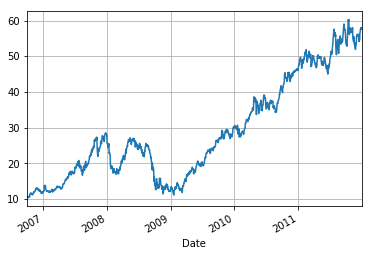

In [16]:
# Plot the closing prices for `aapl`.
aapl['Close'].plot(grid=True)

# Show the plot.
plt.show()

# Financial Analysis

In [18]:
# Assign `Adj Close` to `daily_close`.
daily_close = aapl[['Adj Close']]

# Daily returns.
daily_pct_c = daily_close.pct_change()

# Replace NA values with 0.
daily_pct_c.fillna(0, inplace=True)

# Inspect daily returns.
print(daily_pct_c)

            Adj Close
Date                 
2006-10-02   0.000000
2006-10-03  -0.010420
2006-10-04   0.017549
2006-10-05  -0.007296
2006-10-06  -0.008152
2006-10-09   0.005524
2006-10-10  -0.010987
2006-10-11  -0.007858
2006-10-12   0.027721
2006-10-13  -0.003189
2006-10-16   0.005065
2006-10-17  -0.014721
2006-10-18   0.003231
2006-10-19   0.059842
2006-10-20   0.012154
2006-10-23   0.018887
2006-10-24  -0.005033
2006-10-25   0.007773
2006-10-26   0.006244
2006-10-27  -0.021657
2006-10-30   0.000124
2006-10-31   0.008207
2006-11-01  -0.023680
2006-11-02  -0.002274
2006-11-03  -0.008736
2006-11-06   0.018138
2006-11-07   0.010037
2006-11-08   0.024096
2006-11-09   0.010794
2006-11-10  -0.002640
...               ...
2011-11-17  -0.019128
2011-11-18  -0.006545
2011-11-21  -0.015816
2011-11-22   0.020325
2011-11-23  -0.025285
2011-11-25  -0.009319
2011-11-28   0.034519
2011-11-29  -0.007764
2011-11-30   0.024116
2011-12-01   0.014992
2011-12-02   0.004563
2011-12-05   0.008494
2011-12-06

**Calculating the log returns, using np.log(), to get a better insight into the growth of your returns over time.**



In [19]:
# Daily log returns.
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns.
print(daily_log_returns)

            Adj Close
Date                 
2006-10-02        NaN
2006-10-03  -0.010474
2006-10-04   0.017397
2006-10-05  -0.007323
2006-10-06  -0.008185
2006-10-09   0.005509
2006-10-10  -0.011048
2006-10-11  -0.007889
2006-10-12   0.027343
2006-10-13  -0.003194
2006-10-16   0.005053
2006-10-17  -0.014831
2006-10-18   0.003225
2006-10-19   0.058119
2006-10-20   0.012080
2006-10-23   0.018711
2006-10-24  -0.005046
2006-10-25   0.007742
2006-10-26   0.006225
2006-10-27  -0.021895
2006-10-30   0.000124
2006-10-31   0.008173
2006-11-01  -0.023965
2006-11-02  -0.002277
2006-11-03  -0.008775
2006-11-06   0.017975
2006-11-07   0.009987
2006-11-08   0.023811
2006-11-09   0.010737
2006-11-10  -0.002643
...               ...
2011-11-17  -0.019313
2011-11-18  -0.006566
2011-11-21  -0.015942
2011-11-22   0.020121
2011-11-23  -0.025610
2011-11-25  -0.009363
2011-11-28   0.033936
2011-11-29  -0.007794
2011-11-30   0.023830
2011-12-01   0.014881
2011-12-02   0.004553
2011-12-05   0.008458
2011-12-06

In [20]:
# Daily returns.
daily_pct_c = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_c`.
print(daily_pct_c)

            Adj Close
Date                 
2006-10-02        NaN
2006-10-03  -0.010420
2006-10-04   0.017549
2006-10-05  -0.007296
2006-10-06  -0.008152
2006-10-09   0.005524
2006-10-10  -0.010987
2006-10-11  -0.007858
2006-10-12   0.027721
2006-10-13  -0.003189
2006-10-16   0.005065
2006-10-17  -0.014721
2006-10-18   0.003231
2006-10-19   0.059842
2006-10-20   0.012154
2006-10-23   0.018887
2006-10-24  -0.005033
2006-10-25   0.007773
2006-10-26   0.006244
2006-10-27  -0.021657
2006-10-30   0.000124
2006-10-31   0.008207
2006-11-01  -0.023680
2006-11-02  -0.002274
2006-11-03  -0.008736
2006-11-06   0.018138
2006-11-07   0.010037
2006-11-08   0.024096
2006-11-09   0.010794
2006-11-10  -0.002640
...               ...
2011-11-17  -0.019128
2011-11-18  -0.006545
2011-11-21  -0.015816
2011-11-22   0.020325
2011-11-23  -0.025285
2011-11-25  -0.009319
2011-11-28   0.034519
2011-11-29  -0.007764
2011-11-30   0.024116
2011-12-01   0.014992
2011-12-02   0.004563
2011-12-05   0.008494
2011-12-06

In [21]:
# Resample `aapl` to business months, take last observation as value.
monthly = aapl.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change.
monthly.pct_change()

# Resample `aapl` to quarters, take the mean as value per quarter.
quarter = aapl.resample("4M").mean() 

# Calculate the quarterly percentage change.
quarter.pct_change()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-31,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-28,0.126451,0.121460,0.125777,0.122860,0.369611,0.122860
2007-06-30,0.195413,0.198331,0.196030,0.197735,-0.080296,0.197735
2007-10-31,0.404613,0.392010,0.400961,0.400796,0.306882,0.400796
2008-02-29,0.130711,0.117746,0.127066,0.120394,0.172293,0.120394
2008-06-30,-0.004290,0.005927,-0.003550,0.003673,-0.209762,0.003673
2008-10-31,-0.108879,-0.124618,-0.114267,-0.118803,0.133219,-0.118803
2009-02-28,-0.363388,-0.359305,-0.363639,-0.360865,-0.161601,-0.360865
2009-06-30,0.304359,0.324702,0.312134,0.316588,-0.386935,0.316588


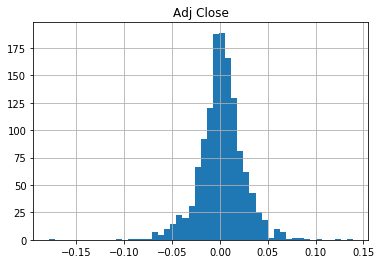

In [22]:
# Plot the distribution of `daily_pct_c`.
daily_pct_c.hist(bins=50)

# Show the plot.
plt.show()


The distribution looks very symmetrical and normally distributed: the daily changes center around the bin 0.00.

In [23]:
# Pull up summary statistics.
print(daily_pct_c.describe())

         Adj Close
count  1322.000000
mean      0.001566
std       0.023992
min      -0.179195
25%      -0.010672
50%       0.001677
75%       0.014306
max       0.139050


In [24]:
# Calculate the cumulative daily returns.
cum_daily_return = (1 + daily_pct_c).cumprod()

# Print `cum_daily_return`.
print(cum_daily_return)

            Adj Close
Date                 
2006-10-02        NaN
2006-10-03   0.989580
2006-10-04   1.006946
2006-10-05   0.999600
2006-10-06   0.991451
2006-10-09   0.996928
2006-10-10   0.985974
2006-10-11   0.978226
2006-10-12   1.005343
2006-10-13   1.002137
2006-10-16   1.007213
2006-10-17   0.992386
2006-10-18   0.995592
2006-10-19   1.055170
2006-10-20   1.067994
2006-10-23   1.088165
2006-10-24   1.082688
2006-10-25   1.091103
2006-10-26   1.097916
2006-10-27   1.074138
2006-10-30   1.074272
2006-10-31   1.083088
2006-11-01   1.057441
2006-11-02   1.055036
2006-11-03   1.045819
2006-11-06   1.064788
2006-11-07   1.075474
2006-11-08   1.101389
2006-11-09   1.113278
2006-11-10   1.110339
...               ...
2011-11-17   5.041545
2011-11-18   5.008550
2011-11-21   4.929336
2011-11-22   5.029522
2011-11-23   4.902352
2011-11-25   4.856665
2011-11-28   5.024312
2011-11-29   4.985306
2011-11-30   5.105531
2011-12-01   5.182072
2011-12-02   5.205718
2011-12-05   5.249933
2011-12-06

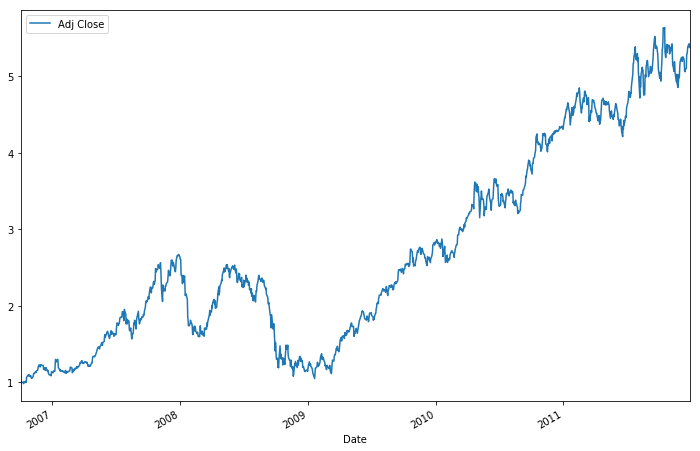

In [25]:
# Plot the cumulative daily returns.
cum_daily_return.plot(figsize=(12,8))

# Show the plot.
plt.show()

In [26]:
# Resample the cumulative daily return to cumulative monthly return.
cum_monthly_return = cum_daily_return.resample("M").mean()

# Print the `cum_monthly_return`.
print(cum_monthly_return)

            Adj Close
Date                 
2006-10-31   1.031710
2006-11-30   1.140058
2006-12-31   1.155110
2007-01-31   1.187303
2007-02-28   1.145176
2007-03-31   1.210302
2007-04-30   1.251737
2007-05-31   1.453453
2007-06-30   1.625638
2007-07-31   1.818073
2007-08-31   1.734484
2007-09-30   1.897943
2007-10-31   2.295090
2007-11-30   2.333130
2007-12-31   2.544817
2008-01-31   2.142374
2008-02-29   1.671828
2008-03-31   1.747569
2008-04-30   2.113108
2008-05-31   2.468068
2008-06-30   2.384260
2008-07-31   2.240831
2008-08-31   2.285193
2008-09-30   1.886766
2008-10-31   1.322521
2008-11-30   1.254883
2008-12-31   1.222865
2009-01-31   1.185880
2009-02-28   1.256669
2009-03-31   1.302498
...               ...
2009-07-31   1.994632
2009-08-31   2.221219
2009-09-30   2.374922
2009-10-31   2.575893
2009-11-30   2.675929
2009-12-31   2.657688
2010-01-31   2.774717
2010-02-28   2.655568
2010-03-31   2.984383
2010-04-30   3.354910
2010-05-31   3.359090
2010-06-30   3.488451
2010-07-31

In [27]:
def get(tickers, startdate, enddate):
    def data(ticker):
        return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
    datas = map (data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))
all_data.head()

High        Low  ...       Volume  Adj Close
Ticker Date                              ...                        
AAPL   2006-10-02  10.838572  10.614285  ...  178159800.0   9.333044
       2006-10-03  10.707143  10.455714  ...  197677200.0   9.235797
       2006-10-04  10.780000  10.451428  ...  207270700.0   9.397876
       2006-10-05  10.880000  10.590000  ...  170970800.0   9.329307
       2006-10-06  10.720000  10.544286  ...  116739700.0   9.253254

[5 rows x 6 columns]

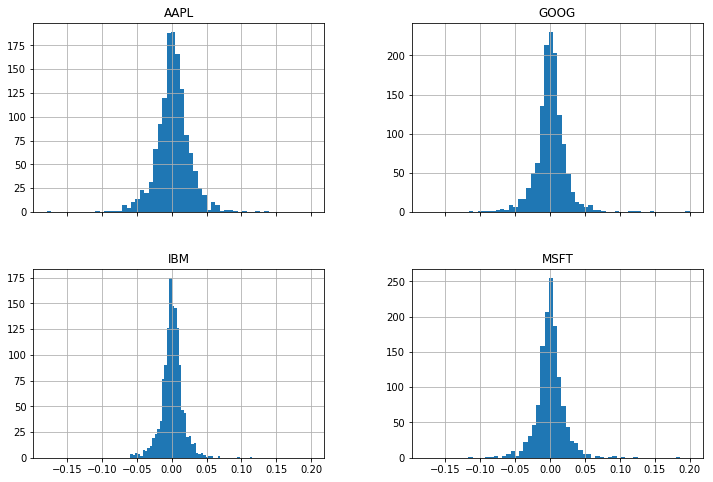

In [28]:
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`.
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions.
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot.
plt.show()

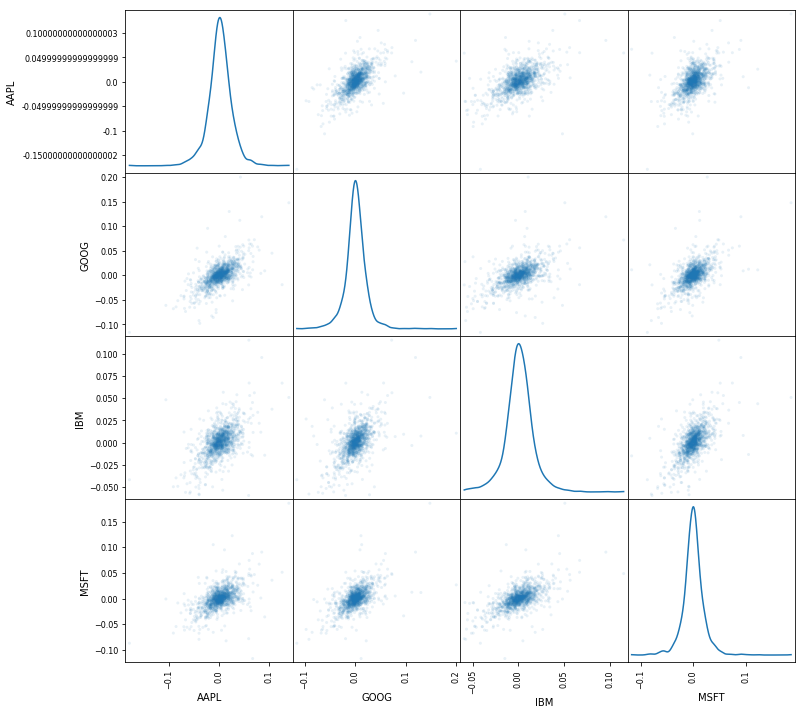

In [29]:
# Plot a scatter matrix with the `daily_pct_change` data.
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot.
plt.show()

Moving windows are there when you compute the statistic on a window of data represented by a particular period of time and then slide the window across the data by a specified interval. That way, the statistic is continually calculated as long as the window falls first within the dates of the time series. A rolling mean smoothes out short-term fluctuations and highlight longer-term trends in data.

In [30]:
# Isolate the adjusted closing prices.
adj_close_px = aapl['Adj Close']

# Calculate the moving average.
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result.
moving_avg[-10:]

Date
2011-12-16    48.461483
2011-12-19    48.428257
2011-12-20    48.397650
2011-12-21    48.393536
2011-12-22    48.387146
2011-12-23    48.382907
2011-12-27    48.387832
2011-12-28    48.381162
2011-12-29    48.407999
2011-12-30    48.431655
Name: Adj Close, dtype: float64

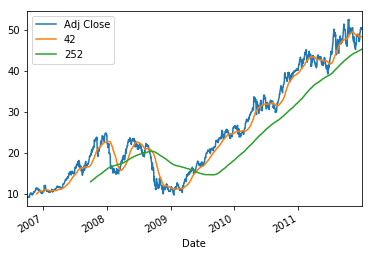

In [31]:
# Short moving window rolling mean.
aapl['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean.
aapl['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means.
aapl[['Adj Close', '42', '252']].plot()

plt.show()

The volatility of a stock is a measurement of the change in variance in the returns of a stock over a specific period of time. It is common to compare the volatility of a stock with another stock to get a feel for which may have less risk or to a market index to examine the stock’s volatility in the overall market. Generally, the higher the volatility, the riskier the investment in that stock, which results in investing in one over another.



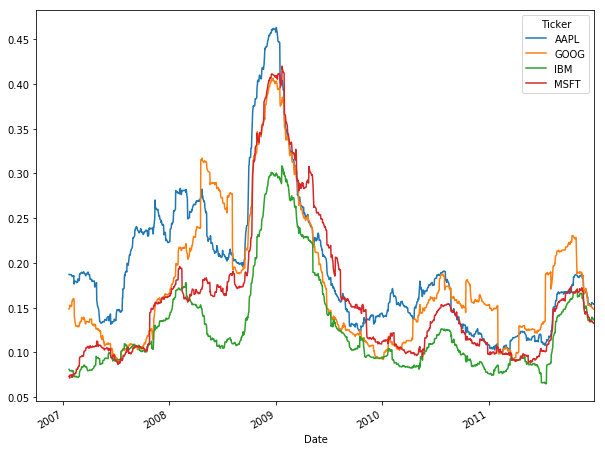

In [32]:
# Define the minumum of periods to consider.
min_periods = 75 

# Calculate the volatility.
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility.
vol.plot(figsize=(10, 8))

# Show the plot.
plt.show()

# Regression Model

In [34]:
# Import the `api` model of `statsmodels` under alias `sm`.
import statsmodels.api as sm
from pandas import tseries
#from pandas.core import datetools

# Isolate the adjusted closing price.
all_adj_close = all_data[['Adj Close']]

# Calculate the returns.
all_returns = np.log(all_adj_close / all_adj_close.shift(1))

# Isolate the AAPL returns.
aapl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'AAPL']
aapl_returns.index = aapl_returns.index.droplevel('Ticker')

# Isolate the MSFT returns.
msft_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'MSFT']
msft_returns.index = msft_returns.index.droplevel('Ticker')

# Build up a new DataFrame with AAPL and MSFT returns.
return_data = pd.concat([aapl_returns, msft_returns], axis=1)[1:]
return_data.columns = ['AAPL', 'MSFT']

# Add a constant.
X = sm.add_constant(return_data['AAPL'])

# Construct the model.
model = sm.OLS(return_data['MSFT'],X).fit()

# Print the summary.
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     515.5
Date:                Sun, 20 Oct 2019   Prob (F-statistic):           1.33e-96
Time:                        19:06:55   Log-Likelihood:                 3514.0
No. Observations:                1322   AIC:                            -7024.
Df Residuals:                    1320   BIC:                            -7014.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.000     -1.119      0.2

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


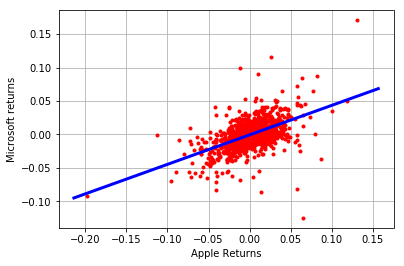

In [39]:
plt.plot(return_data['AAPL'], return_data['MSFT'], 'r.')

ax = plt.axis()
x = np.linspace(ax[0], ax[1] + 0.01)

plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=3)

plt.grid(True)
plt.axis('tight')
plt.xlabel('Apple Returns')
plt.ylabel('Microsoft returns')

plt.show()

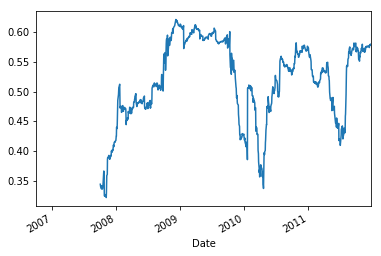

In [40]:
# Use the rolling correlation of returns as a way to crosscheck your results.
return_data['MSFT'].rolling(window=252).corr(return_data['AAPL']).plot()
plt.show()

# The Trading Strategy

**Moving average crossover strategy**

Although not sophisticated thi is a very effective strategy. The strategy is simple as we create two separate Simple Moving Averages (SMA) of a time series with different lookback periods, let’s say, 40 days and 100 days. If the short moving average exceeds the long moving average then you go long, if the long moving average exceeds the short moving average then you exit the market(sell).

When we go long, we think that the stock price will go up and will sell at a higher price in the future (= buy signal); When we go short, we sell the stock, expecting that we can buy it back at a lower price and realize a profit (= sell signal).



In [41]:
# Initialize the short and long windows.
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column.
signals = pd.DataFrame(index=aapl.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window.
signals['short_mavg'] = aapl['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window.
signals['long_mavg'] = aapl['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders.
signals['positions'] = signals['signal'].diff()

# Print `signals`.
print(signals)

            signal  short_mavg  long_mavg  positions
Date                                                
2006-10-02     0.0   10.694285  10.694285        NaN
2006-10-03     0.0   10.638571  10.638571        0.0
2006-10-04     0.0   10.681905  10.681905        0.0
2006-10-05     0.0   10.683928  10.683928        0.0
2006-10-06     0.0   10.667714  10.667714        0.0
2006-10-09     0.0   10.666667  10.666667        0.0
2006-10-10     0.0   10.649184  10.649184        0.0
2006-10-11     0.0   10.625714  10.625714        0.0
2006-10-12     0.0   10.639683  10.639683        0.0
2006-10-13     0.0   10.647429  10.647429        0.0
2006-10-16     0.0   10.658701  10.658701        0.0
2006-10-17     0.0   10.654881  10.654881        0.0
2006-10-18     0.0   10.654286  10.654286        0.0
2006-10-19     0.0   10.699286  10.699286        0.0
2006-10-20     0.0   10.747429  10.747429        0.0
2006-10-23     0.0   10.803036  10.803036        0.0
2006-10-24     0.0   10.848655  10.848655     

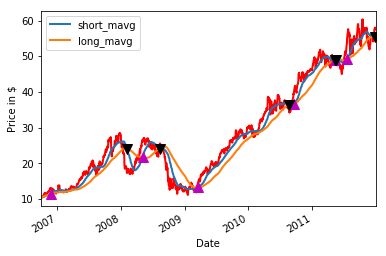

In [43]:
# Initialize the plot figure.
fig = plt.figure()

# Add a subplot and label for y-axis.
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price.
aapl['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages.
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals.
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', 
         markersize=10,
         color='m'
        )
         
# Plot the sell signals.
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', 
         markersize=10, 
         color='k'
        )
         
# Show the plot.
plt.show()

# Backtesting
Backtesting is, besides just "testing a trading strategy", testing the strategy on relevant historical data to make sure that it’s an actual viable strategy before you start making moves. With backtesting, a trader can simulate and analyze the risk and profitability of trading with a specific strategy over a period of time.

In [44]:
# Set the initial capital.
initial_capital= float(100000.0)

# Create a DataFrame `positions`.
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares.
positions['AAPL'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned.   
portfolio = positions.multiply(aapl['Adj Close'], axis=0)

# Store the difference in shares owned. 
pos_diff = positions.diff()

# Add `holdings` to portfolio.
portfolio['holdings'] = (positions.multiply(aapl['Adj Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio.
portfolio['cash'] = initial_capital - (pos_diff.multiply(aapl['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio.
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio.
portfolio['returns'] = portfolio['total'].pct_change()

print(portfolio)

                   AAPL     holdings           cash          total   returns
Date                                                                        
2006-10-02     0.000000     0.000000  100000.000000  100000.000000       NaN
2006-10-03     0.000000     0.000000  100000.000000  100000.000000  0.000000
2006-10-04     0.000000     0.000000  100000.000000  100000.000000  0.000000
2006-10-05     0.000000     0.000000  100000.000000  100000.000000  0.000000
2006-10-06     0.000000     0.000000  100000.000000  100000.000000  0.000000
2006-10-09     0.000000     0.000000  100000.000000  100000.000000  0.000000
2006-10-10     0.000000     0.000000  100000.000000  100000.000000  0.000000
2006-10-11     0.000000     0.000000  100000.000000  100000.000000  0.000000
2006-10-12     0.000000     0.000000  100000.000000  100000.000000  0.000000
2006-10-13     0.000000     0.000000  100000.000000  100000.000000  0.000000
2006-10-16     0.000000     0.000000  100000.000000  100000.000000  0.000000

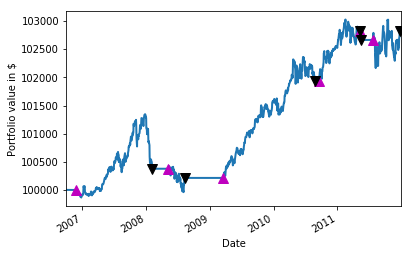

In [45]:
fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars.
portfolio['total'].plot(ax=ax1, lw=2.)

# Plot the "buy" trades against the equity curve.
ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', 
         markersize=10, 
         color='m')

# Plot the "sell" trades against the equity curve.
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', 
         markersize=10, 
         color='k')

# Show the plot.
plt.show()

# Evaluation

In [46]:
# Isolate the returns of your strategy.
returns = portfolio['returns']

# annualized Sharpe ratio.
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio.
print(sharpe_ratio)

0.7259347313290616


**Maximum drawdown**

Maximum drawdown is used to measure the largest single drop from peak to bottom in the value of a portfolio, so before a new peak is achieved. In other words, the score indicates the risk of a portfolio chosen based on a certain strategy.

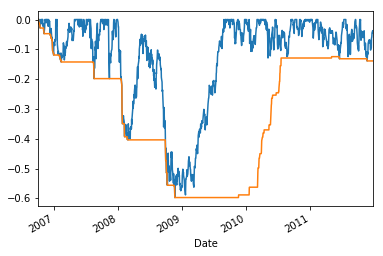

In [47]:
# Define a trailing 252 trading day window.
window = 252

# Calculate the max drawdown in the past window days for each day.
rolling_max = aapl['Adj Close'].rolling(window, min_periods=1).max()
daily_drawdown = aapl['Adj Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown.
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results.
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot.
plt.show()